#**3. Project: Market Basket Analysis (Apriori) - Groceries Dataset**

**Project Overview:**
This project performs Market Basket Analysis using the Apriori algorithm.
It identifies groups of items that are frequently purchased together and
finds association rules to understand customer purchasing behavior.

**Objective:**

To discover buying patterns that can help in improving:
- Store layout
- Product promotions
- Cross-selling opportunities


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Data loaded successfully.
Total Rows: 38765, Columns: 3
Column Names: ['Member_number', 'Date', 'itemDescription']

Sample Data:
    Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk 

Transaction column detected: Member_number
Item column detected: itemDescription


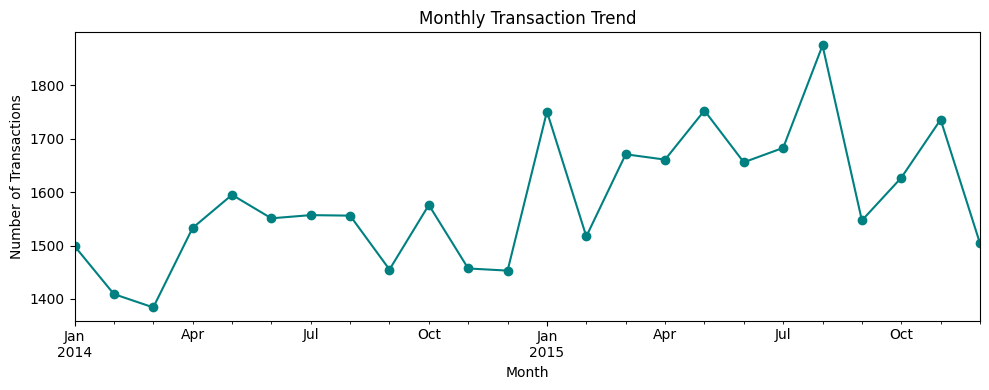

Basket matrix created successfully. Shape: (3898, 167)

Top Frequent Itemsets:
     support                        itemsets
0  0.458184                    (whole milk)
1  0.376603              (other vegetables)
2  0.349666                    (rolls/buns)
3  0.313494                          (soda)
4  0.282966                        (yogurt)
5  0.233710                (tropical fruit)
6  0.230631               (root vegetables)
7  0.213699                 (bottled water)
8  0.206003                       (sausage)
9  0.191380  (other vegetables, whole milk)

Strong Rules (confidence ≥ 0.5, lift ≥ 1.2):
                            antecedents         consequents   support  \
55       (other vegetables, rolls/buns)        (whole milk)  0.082093   
85           (other vegetables, yogurt)        (whole milk)  0.071832   
102            (other vegetables, soda)        (whole milk)  0.069266   
130                (yogurt, rolls/buns)        (whole milk)  0.065931   
179   (other vegetables, 

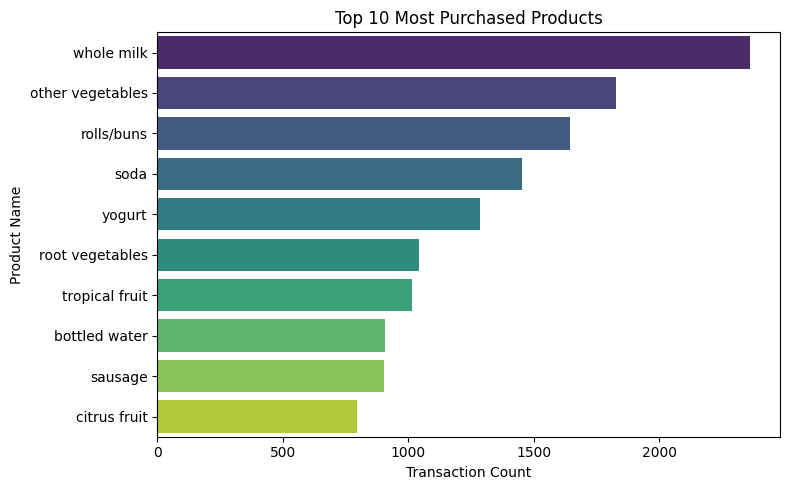

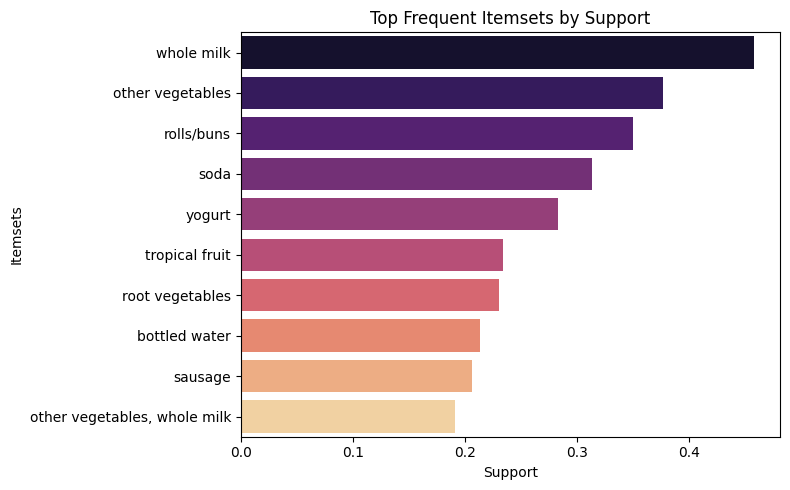

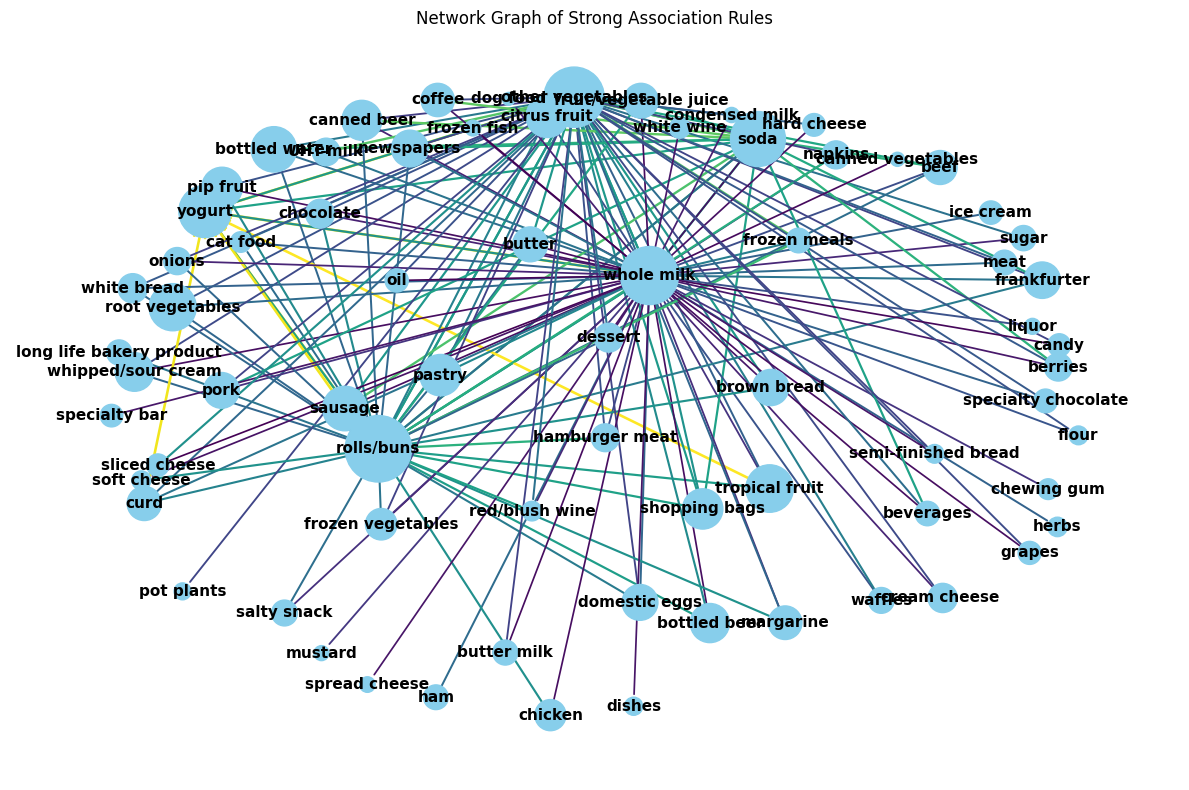


Business Insights:
If a customer buys [other vegetables, rolls/buns], they are likely to buy [whole milk] (support=0.082, confidence=0.56, lift=1.22)
If a customer buys [other vegetables, yogurt], they are likely to buy [whole milk] (support=0.072, confidence=0.60, lift=1.30)
If a customer buys [other vegetables, soda], they are likely to buy [whole milk] (support=0.069, confidence=0.56, lift=1.22)
If a customer buys [yogurt, rolls/buns], they are likely to buy [whole milk] (support=0.066, confidence=0.59, lift=1.29)
If a customer buys [other vegetables, bottled water], they are likely to buy [whole milk] (support=0.056, confidence=0.60, lift=1.31)
If a customer buys [whole milk, bottled water], they are likely to buy [other vegetables] (support=0.056, confidence=0.50, lift=1.33)
If a customer buys [soda, yogurt], they are likely to buy [whole milk] (support=0.054, confidence=0.56, lift=1.22)
If a customer buys [other vegetables, tropical fruit], they are likely to buy [whole milk] (s

In [2]:
# Step 1: Import all necessary libraries
# Step 1: Import all necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd                    # For working with data
import matplotlib.pyplot as plt         # For creating visualizations
import seaborn as sns                   # For styling charts
import networkx as nx                   # For visualizing association networks
from mlxtend.frequent_patterns import apriori, association_rules  # For Apriori algorithm

# Step 2: Load the dataset
# Make sure the CSV file is placed in the same folder as this script
df = pd.read_csv("Market_basket_analysis_dataset.csv")

# Display basic information about the dataset
print("Data loaded successfully.")
print(f"Total Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("Column Names:", list(df.columns))
print("\nSample Data:\n", df.head(), "\n")

# Step 3: Data Cleaning
# Remove any duplicate rows to ensure clean transactions
df = df.drop_duplicates().reset_index(drop=True)

# Convert 'Date' column to datetime format if it exists in the dataset
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Step 4: Identify columns for transactions and products
# The goal is to detect which column represents transaction ID and which represents product name
possible_transaction_cols = ["Member_number", "TransactionNo", "Transaction", "InvoiceNo"]
possible_item_cols = ["itemDescription", "Item", "Product", "Description"]

transaction_col, item_col = None, None
for col in df.columns:
    if col in possible_transaction_cols:
        transaction_col = col
    if col in possible_item_cols:
        item_col = col

# Stop the program if these columns are not found
if not transaction_col or not item_col:
    raise ValueError("Transaction or Item column not found. Please check dataset column names.")

print(f"Transaction column detected: {transaction_col}")
print(f"Item column detected: {item_col}")

# Step 5: Exploratory Data Analysis (EDA)
# Check monthly transaction patterns if the dataset contains a date column
if "Date" in df.columns:
    monthly_sales = df.groupby(df["Date"].dt.to_period("M"))[item_col].count()
    plt.figure(figsize=(10, 4))
    monthly_sales.plot(marker='o', color='teal')
    plt.title("Monthly Transaction Trend")
    plt.xlabel("Month")
    plt.ylabel("Number of Transactions")
    plt.tight_layout()
    plt.show()

# Step 6: Create the basket matrix
# This converts transactions into a matrix of 0s and 1s
# Each row = one transaction, each column = one product
# 1 means the product was purchased in that transaction, 0 means it was not
basket = df.groupby([transaction_col, item_col])[item_col].count().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(int)

print(f"Basket matrix created successfully. Shape: {basket.shape}")

# Step 7: Generate frequent itemsets using Apriori algorithm
# Keep only those combinations of items that appear in at least 1% of all transactions
MIN_SUPPORT = 0.01
frequent_itemsets = apriori(basket, min_support=MIN_SUPPORT, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False).reset_index(drop=True)

# Display top frequent itemsets
print("\nTop Frequent Itemsets:\n", frequent_itemsets.head(10))
frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)

# Step 8: Generate association rules from the frequent itemsets
# These rules help identify relationships between items (e.g., if someone buys bread, they may buy milk)
MIN_CONFIDENCE = 0.5
MIN_LIFT = 1.2

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
strong_rules = rules[(rules["confidence"] >= MIN_CONFIDENCE) & (rules["lift"] >= MIN_LIFT)]

# If no strong rules are found, try slightly lower thresholds
if strong_rules.empty:
    print("\nNo strong rules found with default thresholds. Trying relaxed values...")
    MIN_CONFIDENCE, MIN_LIFT = 0.3, 1.0
    strong_rules = rules[(rules["confidence"] >= MIN_CONFIDENCE) & (rules["lift"] >= MIN_LIFT)]

# Display top association rules
print(f"\nStrong Rules (confidence ≥ {MIN_CONFIDENCE}, lift ≥ {MIN_LIFT}):")
if not strong_rules.empty:
    print(strong_rules.head(10)[["antecedents", "consequents", "support", "confidence", "lift"]])
else:
    print("No strong rules found.")

# Save strong rules for reference
if not strong_rules.empty:
    strong_rules.to_csv("association_rules.csv", index=False)
    print("Strong rules saved to 'association_rules.csv'.")

# Step 9: Visualize top 10 most purchased products
plt.figure(figsize=(8, 5))
top_products = df[item_col].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Transaction Count")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Step 10: Visualize top frequent itemsets based on support
if not frequent_itemsets.empty:
    top_itemsets = frequent_itemsets.head(10).copy()
    top_itemsets["itemsets_str"] = top_itemsets["itemsets"].apply(lambda s: ", ".join(list(s)))
    plt.figure(figsize=(8, 5))
    sns.barplot(x="support", y="itemsets_str", data=top_itemsets, palette="magma")
    plt.title("Top Frequent Itemsets by Support")
    plt.xlabel("Support")
    plt.ylabel("Itemsets")
    plt.tight_layout()
    plt.show()

# Step 11: Create a network graph of strong association rules
# This helps to visualize the relationships between items
if not strong_rules.empty:
    G = nx.DiGraph()
    node_support = {}

    # Add nodes (items) and edges (connections) based on the rules
    for _, row in strong_rules.iterrows():
        for a in row["antecedents"]:
            s_val = frequent_itemsets.loc[
                frequent_itemsets["itemsets"] == frozenset([a]), "support"
            ].values
            node_support[a] = s_val[0] if len(s_val) > 0 else 0

        for c in row["consequents"]:
            s_val = frequent_itemsets.loc[
                frequent_itemsets["itemsets"] == frozenset([c]), "support"
            ].values
            node_support[c] = s_val[0] if len(s_val) > 0 else 0
            for a in row["antecedents"]:
                G.add_edge(a, c, weight=row["lift"])

    # Draw the network graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1.5, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in node_support.values()],
                           node_color='skyblue')
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20,
                           width=[d['weight'] for (_, _, d) in edges],
                           edge_color=[d['weight'] for (_, _, d) in edges], edge_cmap=plt.cm.viridis)
    nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold')
    plt.title("Network Graph of Strong Association Rules")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo strong rules to visualize as a network graph.")

# Step 12: Print Business Insights
# This section translates the rules into simple, readable insights
print("\nBusiness Insights:")
if not strong_rules.empty:
    for _, row in strong_rules.head(15).iterrows():
        antecedent = ", ".join(list(row["antecedents"]))
        consequent = ", ".join(list(row["consequents"]))
        print(f"If a customer buys [{antecedent}], they are likely to buy [{consequent}] "
              f"(support={row['support']:.3f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")
else:
    print("No strong rules found. Try using a larger dataset or adjusting thresholds.")

# Step 13: Conclusion
print("\nConclusion:")
print("Market Basket Analysis helped identify item combinations that are frequently purchased together.")
print("These insights can help in improving store layout, cross-selling strategies, and product promotions.")
print("\nProject completed successfully.")